In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
banking_data = pd.read_csv('Banking_Churn_rate_data.csv')

In [3]:
banking_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
banking_data.drop(labels=['RowNumber', 'Surname'], axis=1, inplace=True)

In [79]:
banking_data.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
CS_Grade           0
AgeCategory        0
dtype: int64

In [5]:
banking_data

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [80]:
# Descriptive statistics of the data set

banking_data.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
5%,1.557882e+07,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
90%,1.579083e+07,778.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000
95%,1.580303e+07,812.000000,60.000000,9.000000,162711.669000,2.000000,1.00000,1.000000,190155.375500,1.000000


In [6]:
# To create new column 'SC_Grade' which categorises 'Credit Score' column

In [7]:
conditions = [
    (banking_data['CreditScore']<580),
    (banking_data['CreditScore'] >= 580) & (banking_data['CreditScore']<=669),
    (banking_data['CreditScore'] >= 670) & (banking_data['CreditScore']<= 739),
    (banking_data['CreditScore'] >= 740) & (banking_data['CreditScore'] <= 799),
    (banking_data['CreditScore'] >= 800) & (banking_data['CreditScore'] <= 850)
     ]
     

In [8]:
values = ['Poor', 'Fair', 'Good', 'VeryGood', 'Exceptional']

In [9]:
banking_data['CS_Grade'] = np.select(conditions,values)
banking_data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CS_Grade
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Exceptional


In [114]:
# Change column name "Geography" to "Country"
banking_data.rename(columns={'Geography':'Country'}, inplace=True)

In [10]:
# To create new column 'Age_Cat' which categorises 'Age' column

In [11]:
conditions1 = [
    (banking_data['Age']>=65),
    (banking_data['Age']<=64) & (banking_data['Age']>=41),
    (banking_data['Age']<=40) & (banking_data['Age']>=18)
]

In [12]:
values1 = ['SeniorCitizen', 'MidAgedAdult', 'Adult']

In [13]:
banking_data['AgeCategory'] = np.select(conditions1,values1)
banking_data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CS_Grade,AgeCategory
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair,MidAgedAdult
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair,MidAgedAdult
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor,MidAgedAdult
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good,Adult
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Exceptional,MidAgedAdult


In [115]:
# filter banking_data based on customers that "Exited/churned" and "not-exited/Non-churned" 
exited = banking_data[(banking_data.Exited==1)]
exited

,CustomerId,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CS_Grade,AgeCategory
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair,MidAgedAdult
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor,MidAgedAdult
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Fair,MidAgedAdult
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Poor,Adult
16,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,Fair,MidAgedAdult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,Poor,MidAgedAdult
9982,15768163,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,Fair,MidAgedAdult
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,Fair,MidAgedAdult
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Good,Adult


In [116]:
non_exited = banking_data[(banking_data.Exited==0)]
non_exited

,CustomerId,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CS_Grade,AgeCategory
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair,MidAgedAdult
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good,Adult
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Exceptional,MidAgedAdult
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Exceptional,MidAgedAdult
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Poor,MidAgedAdult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,Fair,Adult
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0,Exceptional,Adult
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,VeryGood,Adult
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Poor,Adult


In [117]:
# check for categorical Variables
categorical_variables = [col for col in banking_data.columns if col in "O"
                        or banking_data[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Country',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'CS_Grade',
 'AgeCategory']

In [118]:
# check for Numeric Variables
numeric_variables = [col for col in banking_data.columns if banking_data[col].dtype != "object"
                        and banking_data[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [119]:
# Frequency of not_churn group according to Tenure
exited["Tenure"].value_counts().sort_values()

0      95
10    101
7     177
6     196
8     197
2     201
4     203
5     209
3     213
9     213
1     232
Name: Tenure, dtype: int64

In [120]:
# Frequency of not_churn group according to Tenure
non_exited["Tenure"].value_counts().sort_values()

0     318
10    389
6     771
9     771
4     786
3     796
1     803
5     803
8     828
2     847
7     851
Name: Tenure, dtype: int64

In [121]:
# Frequency of churn group and non-churn group according to NumOfProducts
print(exited["NumOfProducts"].value_counts().sort_values())
print(non_exited["NumOfProducts"].value_counts().sort_values())

4      60
3     220
2     348
1    1409
Name: NumOfProducts, dtype: int64
3      46
1    3675
2    4242
Name: NumOfProducts, dtype: int64


In [99]:
# examine the HasCrCard of the churn group & non-churn group
print(exited["HasCrCard"].value_counts())
print(non_exited["HasCrCard"].value_counts())

1    1424
0     613
Name: HasCrCard, dtype: int64
1    5631
0    2332
Name: HasCrCard, dtype: int64


In [107]:
# Data Prediction
# Assign dependent variable
y = banking_data.Exited
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [122]:
banking_data.columns

Index(['CustomerId', 'CreditScore', 'Country', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'CS_Grade', 'AgeCategory'],
      dtype='object')

In [123]:
# Assign independent variables
feature_columns = ['CreditScore', 'Age', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary']

In [42]:
X = banking_data[feature_columns]
X.head()

,CreditScore,Age,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,1,1,1,101348.88
1,608,41,1,0,1,112542.58
2,502,42,3,1,0,113931.57
3,699,39,2,0,0,93826.63
4,850,43,1,1,1,79084.10


In [44]:
from sklearn.tree import DecisionTreeRegressor


In [45]:
bank_model = DecisionTreeRegressor(random_state=40)

In [46]:
bank_model.fit(X,y)

DecisionTreeRegressor(random_state=40)

In [47]:
preds = bank_model.predict(X)

In [50]:
print('Exited:', y.head().tolist())
print('Predicted exits:', preds[:5])

Exited: [1, 0, 1, 0, 0]
Predicted exits: [1. 0. 1. 0. 0.]


In [51]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y,preds)
print(mae)

0.0


In [52]:
# Validation
#import train test split
from sklearn.model_selection import train_test_split

In [54]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [55]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (7000, 6)
X_test:  (3000, 6)
y_train:  (7000,)
y_test:  (3000,)


In [62]:
X_train.head()

,CreditScore,Age,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7584,694,39,2,0,0,99924.04
6102,642,36,2,1,1,97938.59
1069,844,40,1,1,0,31904.31
8656,660,31,1,1,1,137784.25
9742,715,45,2,1,1,55043.93


In [63]:
X_test.head()

,CreditScore,Age,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6224,777,39,2,1,1,18613.52
8125,629,38,1,1,0,76053.07
7769,766,27,2,0,1,47579.25
5661,472,26,2,1,0,108411.66
2466,516,32,2,0,0,111421.45


In [64]:
#retrain model
# using X_train and y_train to train our model
bank_model.fit(X_train,y_train)
#predict on the test data
preds2 = bank_model.predict(X_test)


In [65]:
# compare manually
print(y_test.head().tolist())
print(preds2[:5])

[0, 0, 0, 0, 0]
[0. 0. 0. 0. 0.]


In [66]:
#get mean absolute error

mae2 = mean_absolute_error(y_test,preds2)

print('Without splitting',mae)
print('With splitting',mae2)

Without splitting 0.0
With splitting 0.20933333333333334


In [69]:
from sklearn.ensemble import RandomForestRegressor

bank_RF_model = RandomForestRegressor()

In [70]:
#fit your model on the training data
bank_RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
#predict on test data
preds_RF = bank_RF_model.predict(X_test)

In [73]:
#manually compare

print(y_test.head().tolist())
print(preds_RF[:5])

[0, 0, 0, 0, 0]
[0.11 0.33 0.01 0.03 0.  ]


In [74]:
#calculate error
mae_RF = mean_absolute_error(y_test,preds_RF)

print('Decision tree with train test split: ',mae2)
print('Random Forest with train test split: ',mae_RF)

Decision tree with train test split:  0.20933333333333334
Random Forest with train test split:  0.22221333333333337


In [75]:
pd.Series(preds_RF).astype(int).head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

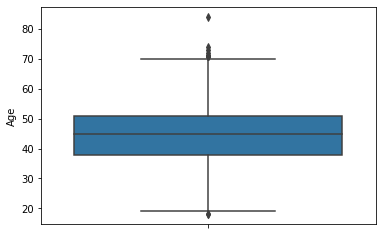

In [136]:
#plot Recency data with boxplot
sns.boxplot(y='Age',data=exited)

plt.show()

<AxesSubplot:>

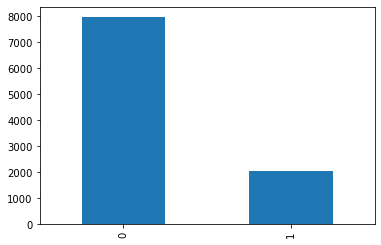

In [124]:
banking_data.Exited.value_counts().plot.bar()

<AxesSubplot:ylabel='Exited'>

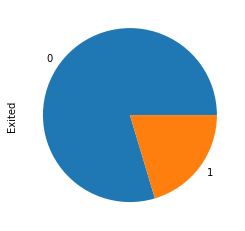

In [16]:
banking_data.Exited.value_counts().plot.pie()

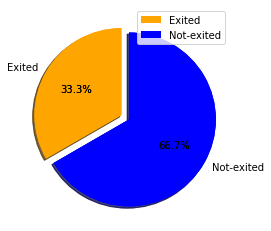

In [162]:
labels = 'Exited', 'Not-exited'
sizes = [15, 30]
colors = ( "orange", "blue") 
fig1, ax1 = plt.subplots()
explode = (0, 0.1) 
 
ax1.pie(sizes, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(sizes, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
 
plt.legend(patches, labels, loc="best")
plt.show()

<AxesSubplot:xlabel='Geography,Exited'>

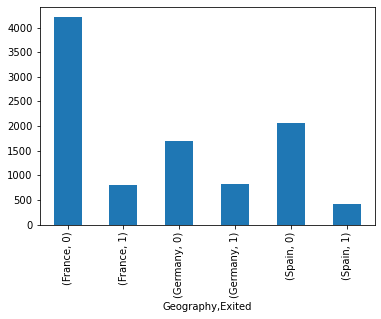

In [17]:
banking_data.groupby('Geography').Exited.value_counts().plot.bar()

<AxesSubplot:>

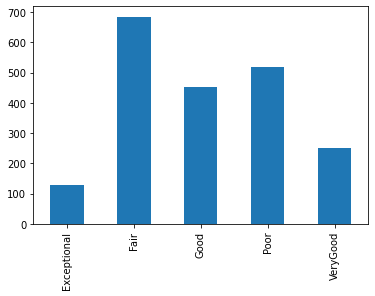

In [19]:
exited.CS_Grade.value_counts().sort_index(axis=0).plot.bar()

<AxesSubplot:>

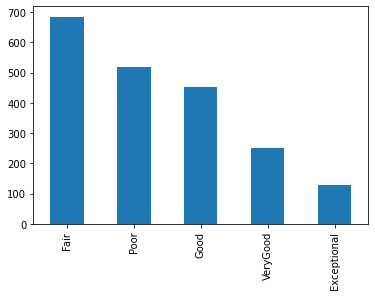

In [20]:
exited.CS_Grade.value_counts().plot.bar()

<AxesSubplot:>

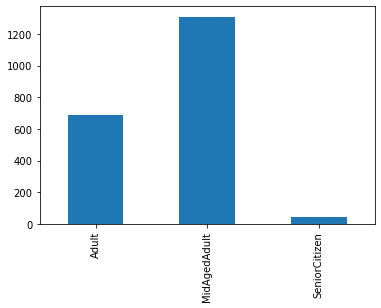

In [21]:
exited.AgeCategory.value_counts().sort_index(axis=0).plot.bar()

<AxesSubplot:>

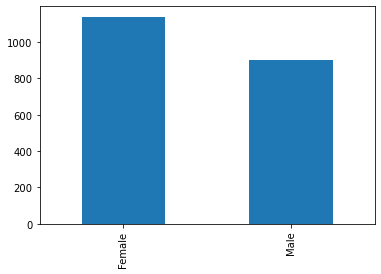

In [22]:
exited.Gender.value_counts().plot.bar()

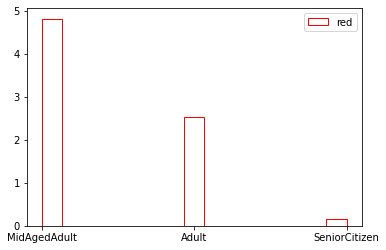

In [184]:
x=exited.AgeCategory
n_bins = 15
     
colors = ['red'] 
   
plt.hist(x, n_bins, density = True,  histtype ='step', color = colors, label = colors) 
   
plt.legend(prop ={'size': 10}) 
   
plt.show()

In [176]:
non_exited.Gender

1       Female
3       Female
4       Female
6         Male
8         Male
         ...  
9993      Male
9994    Female
9995      Male
9996      Male
9999    Female
Name: Gender, Length: 7963, dtype: object

<AxesSubplot:>

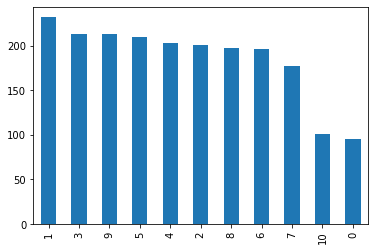

In [23]:
exited.Tenure.value_counts().plot.bar()

<AxesSubplot:>

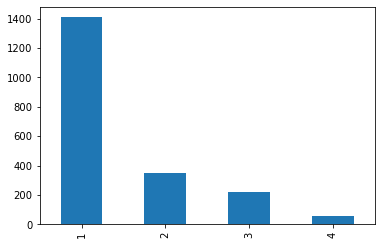

In [24]:
exited.NumOfProducts.value_counts().plot.bar()

<AxesSubplot:>

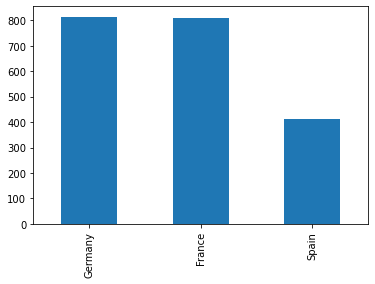

In [25]:
exited.Geography.value_counts().plot.bar()

<AxesSubplot:>

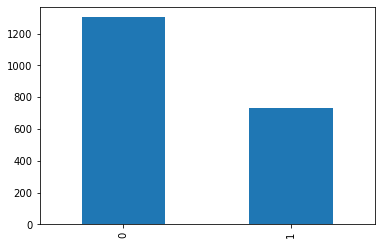

In [26]:
exited.IsActiveMember.value_counts().plot.bar()

<AxesSubplot:>

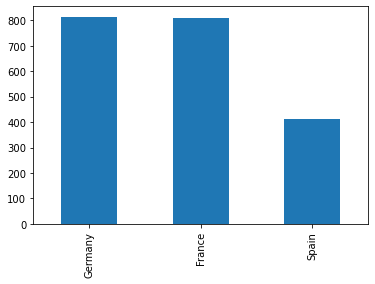

In [156]:
# 2 by 2
exited.Country.value_counts().plot.bar()

In [28]:
pivot = exited.groupby(['HasCrCard','Gender']).CS_Grade.count().astype(int).unstack('Gender')
pivot

Gender,Female,Male
HasCrCard,,
0,344,269
1,795,629


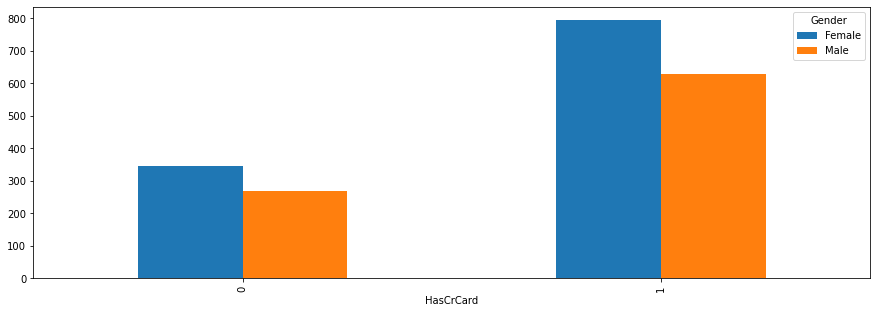

In [29]:
# 2 by 2 for categorical data **demographics

pivot.plot.bar(figsize=(15,5))#we use figsize parameter to set the height and width of the chart
plt.ticklabel_format(style='plain',axis='y')

plt.show()

In [30]:
pivot2 = exited.groupby(['AgeCategory','Gender']).CS_Grade.count().astype(int).unstack('Gender')
pivot2

Gender,Female,Male
AgeCategory,,
Adult,392,294
MidAgedAdult,722,586
SeniorCitizen,25,18


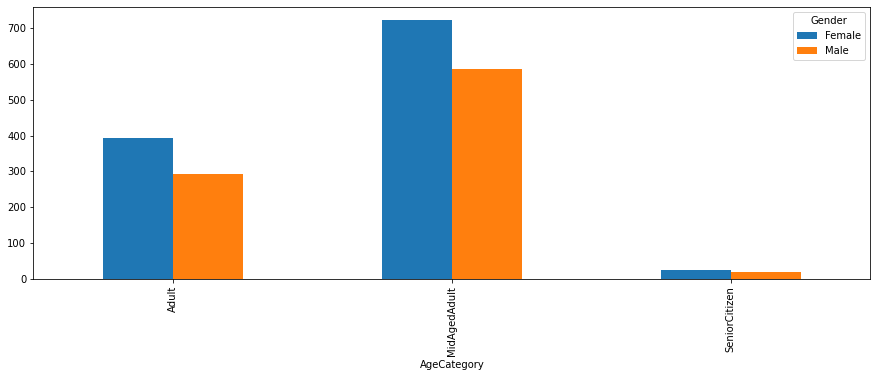

In [31]:
pivot2.plot.bar(figsize=(15,5))#we use figsize parameter to set the height and width of the chart
plt.ticklabel_format(style='plain',axis='y')

plt.show()

In [32]:
pivot3 = exited.groupby(['NumOfProducts','Gender']).CS_Grade.count().astype(int).unstack('Gender')
pivot3

Gender,Female,Male
NumOfProducts,,
1,762,647
2,210,138
3,129,91
4,38,22


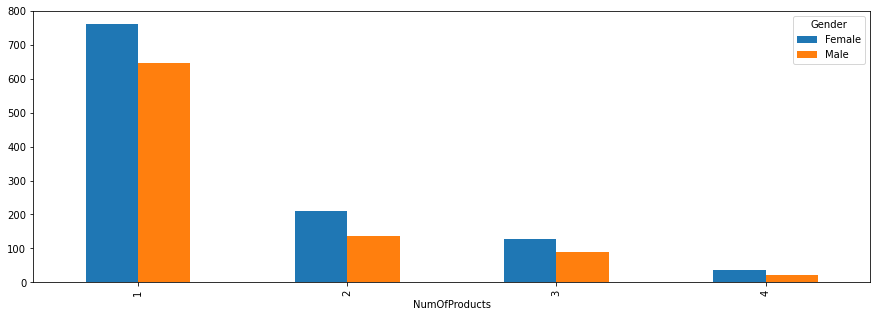

In [33]:
pivot3.plot.bar(figsize=(15,5))#we use figsize parameter to set the height and width of the chart
plt.ticklabel_format(style='plain',axis='y')

plt.show()

In [34]:
pivot4 = exited.groupby(['CS_Grade','Gender']).CS_Grade.count().astype(int).unstack('Gender')
pivot4

Gender,Female,Male
CS_Grade,,
Exceptional,69,59
Fair,395,290
Good,259,193
Poor,271,249
VeryGood,145,107


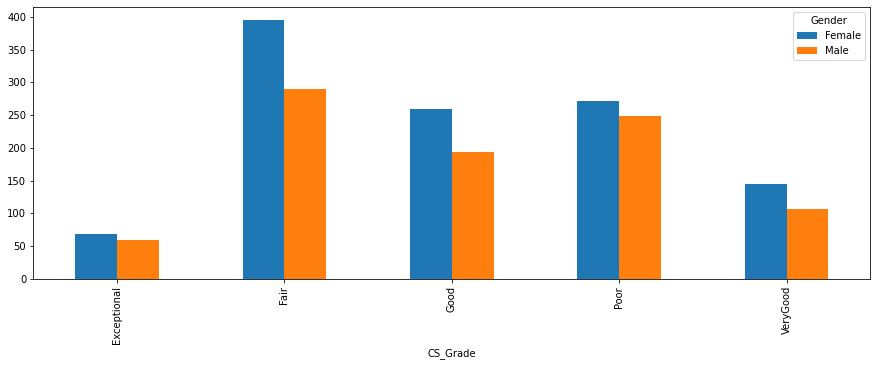

In [35]:
pivot4.plot.bar(figsize=(15,5))#we use figsize parameter to set the height and width of the chart
plt.ticklabel_format(style='plain',axis='y')

plt.show()

In [226]:
# Exited correlation matrix
k = 10 #number of variables for heatmap
cols = banking_data.corr().nlargest(k, 'Exited')['Exited'].index
cm = banking_data[cols].corr()
pyplot.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap = 'viridis')

NameError: name 'pyplot' is not defined

<AxesSubplot:>

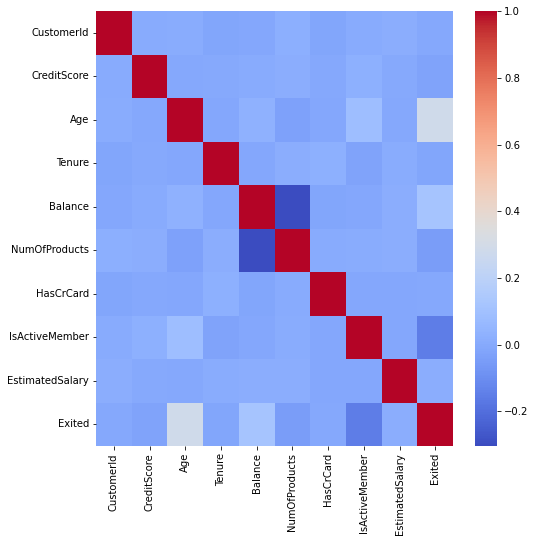

In [228]:
plt.figure(figsize=(8,8))
sns.heatmap(banking_data.corr(),cmap='coolwarm')

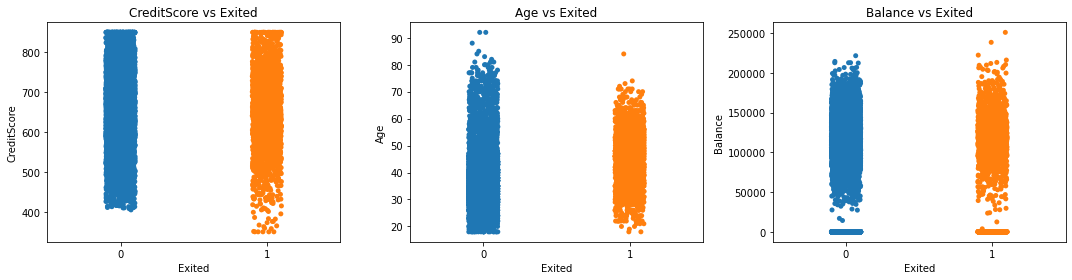

In [189]:
fig, ax = plt.subplots(1,3,figsize=(15,4))

ax[0] = sns.stripplot(y='CreditScore',x='Exited',data = banking_data, ax=ax[0])
ax[0].set_title('CreditScore vs Exited')

ax[1] = sns.stripplot(y='Age',x='Exited',data = banking_data, ax=ax[1])
ax[1].set_title('Age vs Exited')

ax[2] = sns.stripplot(y='Balance',x='Exited',data = banking_data, ax=ax[2])
ax[2].set_title('Balance vs Exited')

plt.tight_layout()
plt.show()

In [158]:
plt.scatter(banking_data)
plt.show

TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(exited.corr(),cmap='coolwarm')

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(non_exited.corr(),cmap='coolwarm')

C:\Users\olufemi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


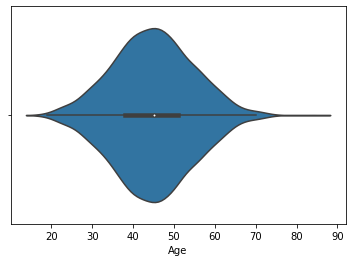

In [139]:
sns.violinplot(exited.Age);

In [ ]:
sns.violinplot(exited.NumOfProducts);

NameError: name 'pyplot' is not defined

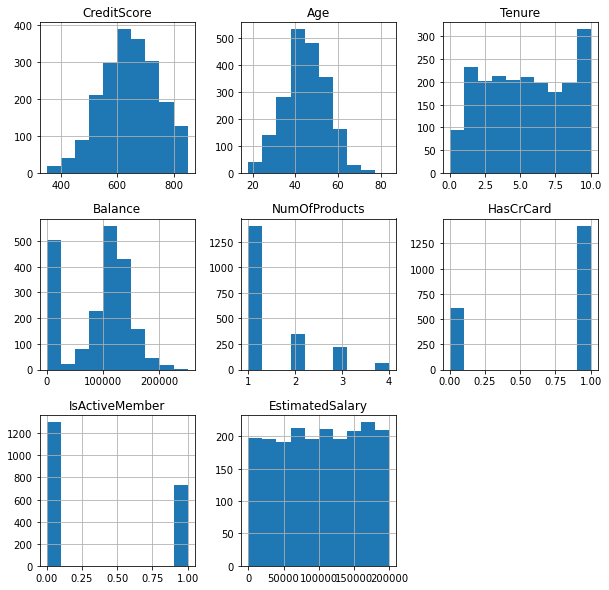

In [196]:
# Plotting of charts as per columns
exited[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']].hist(figsize=(10,10))
pyplot.tight_layout()
pyplot.show()

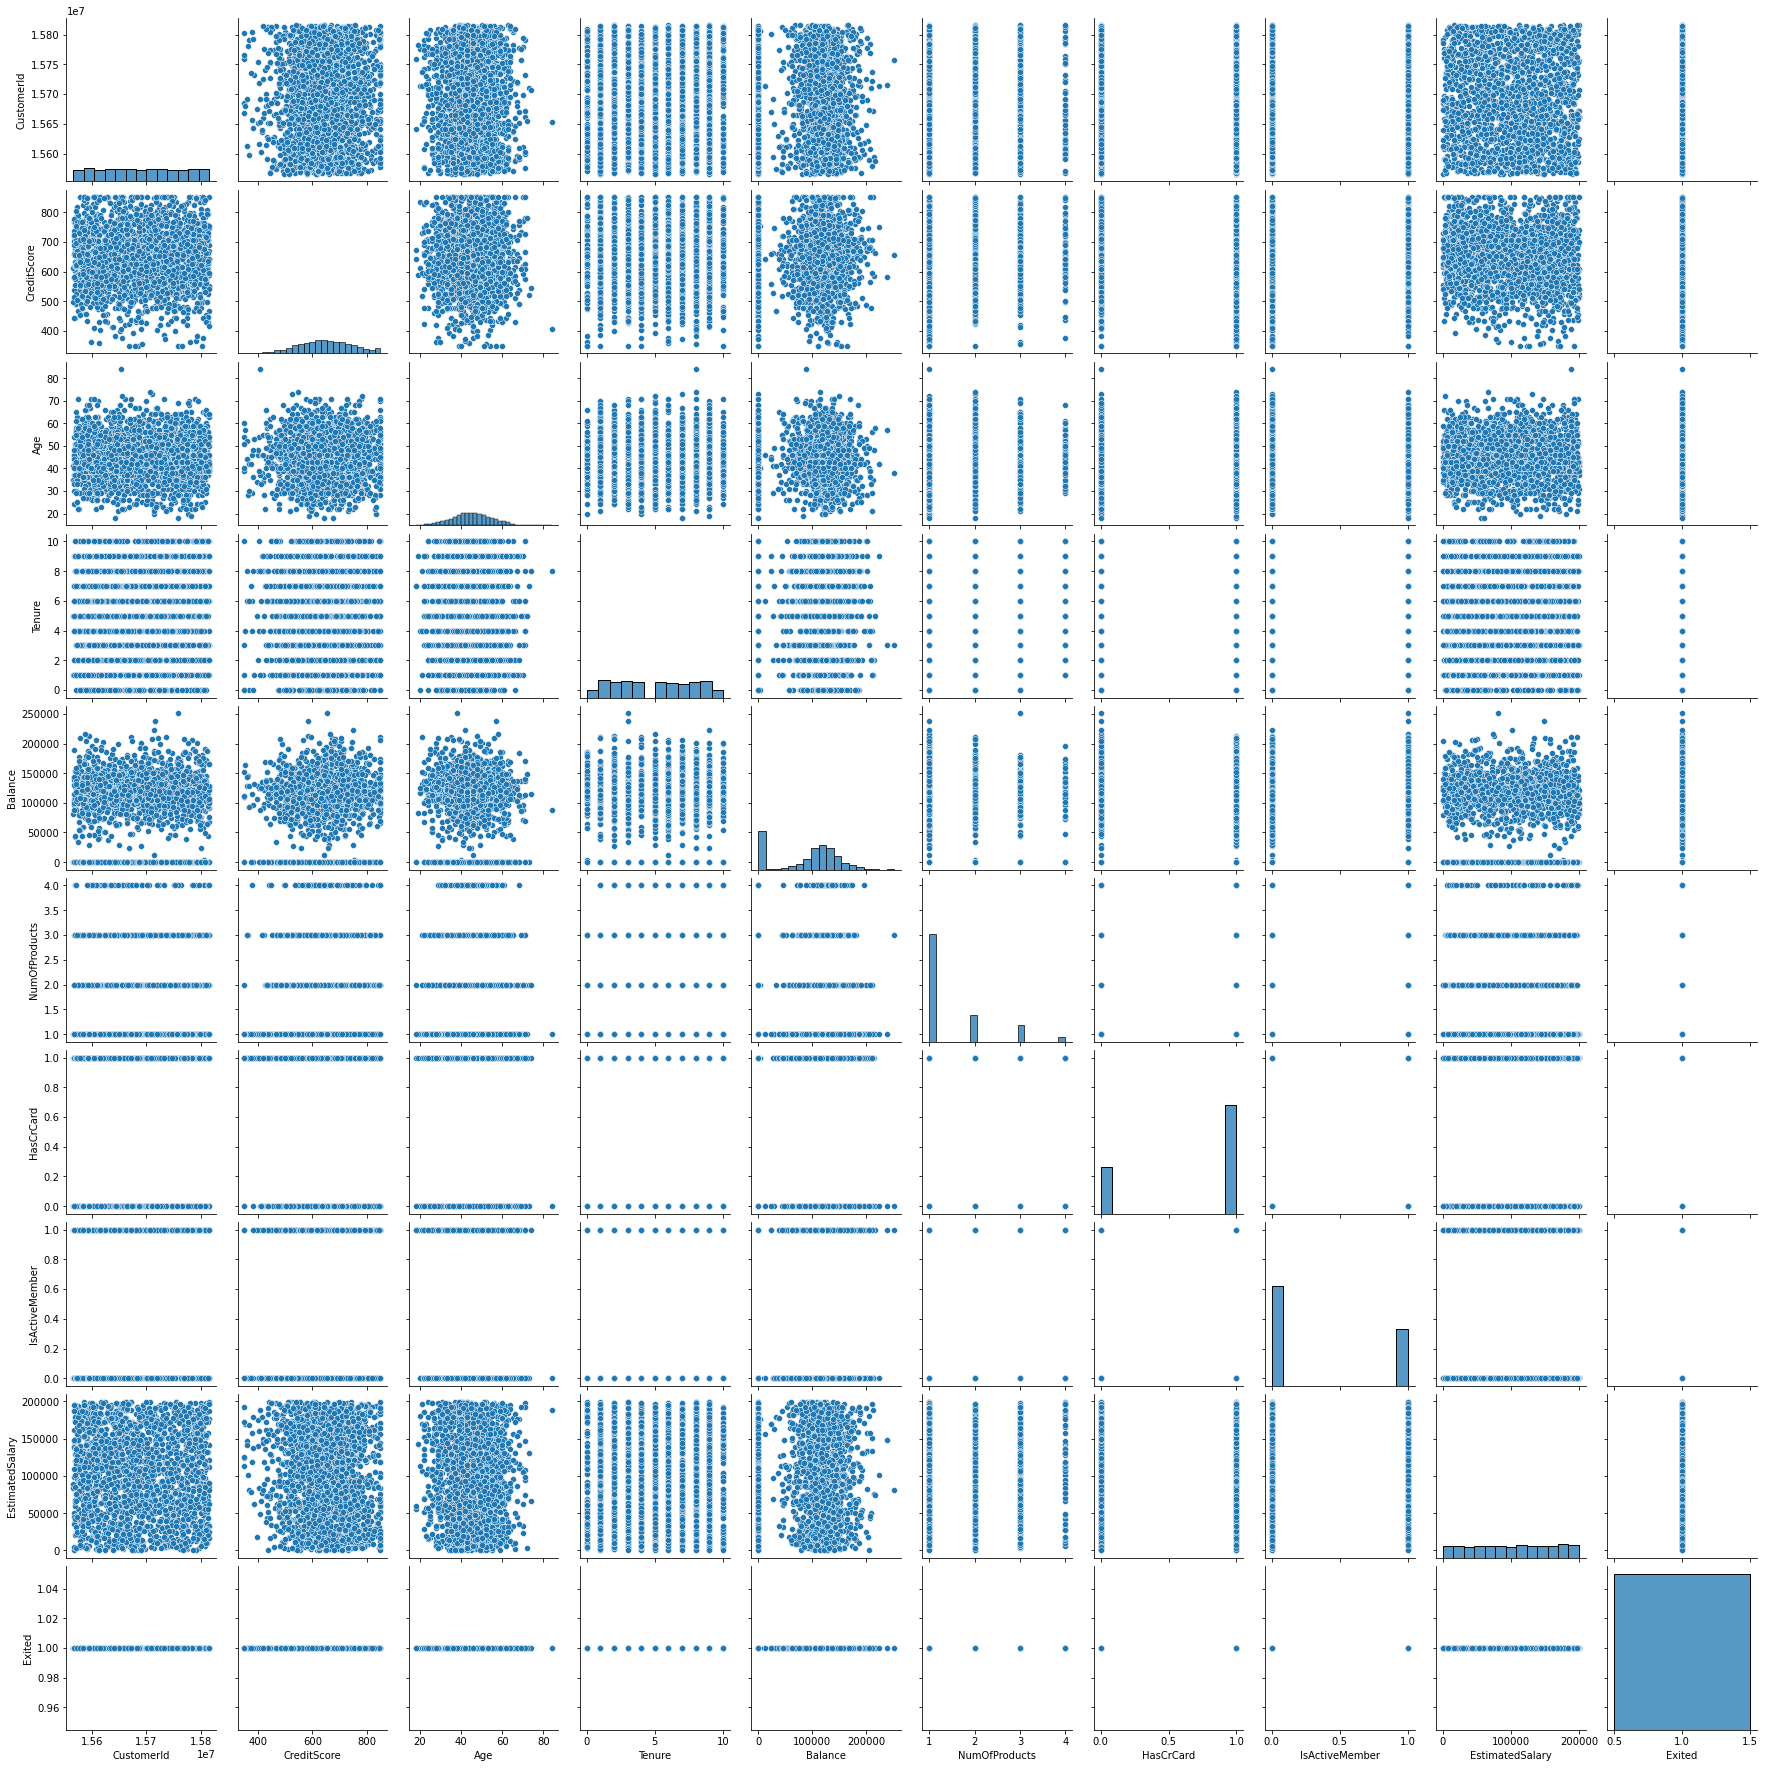

In [199]:
# Plotting of charts as per columns 
sns.pairplot(exited)

<AxesSubplot:xlabel='Gender', ylabel='Tenure'>

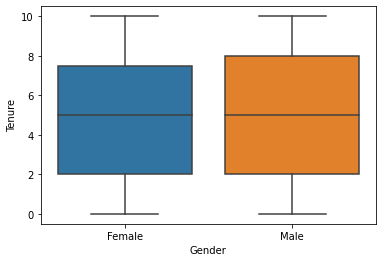

In [207]:
#bivariate analysis: credit score against exited customers
sns.boxplot(x='Gender', y='Tenure', data=exited)

<AxesSubplot:xlabel='AgeCategory', ylabel='Age'>

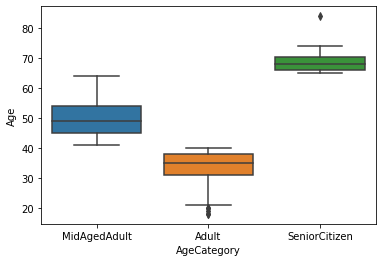

In [218]:
#bivariate analysis: AgeCategory score against Age for exited customers
sns.boxplot(x='AgeCategory', y='Age', data=exited)

<AxesSubplot:xlabel='IsActiveMember', ylabel='Tenure'>

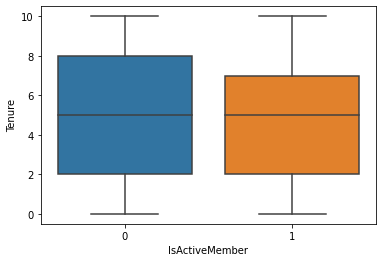

In [225]:
#bivariate analysis: AgeCategory score against Age for exited customers
sns.boxplot(x='IsActiveMember', y='Tenure', data=exited)

In [ ]:
sns.boxplot(x='IsActiveMember', y='Tenure', data=exited)

In [203]:
# How many unique values are in Columns of Data ?
for i in exited.columns:
    if len(exited[i].unique())<6:
      print(F'{i}:',len(exited[i].unique()),'Values:',exited[i].unique())
    else:
      print(F'{i}:',len(exited[i].unique()))

CustomerId: 2037
CreditScore: 420
Country: 3 Values: ['France' 'Spain' 'Germany']
Gender: 2 Values: ['Female' 'Male']
Age: 58
Tenure: 11
Balance: 1538
NumOfProducts: 4 Values: [1 3 2 4]
HasCrCard: 2 Values: [1 0]
IsActiveMember: 2 Values: [1 0]
EstimatedSalary: 2037
Exited: 1 Values: [1]
CS_Grade: 5 Values: ['Fair' 'Poor' 'Exceptional' 'Good' 'VeryGood']
AgeCategory: 3 Values: ['MidAgedAdult' 'Adult' 'SeniorCitizen']
